<a href="https://colab.research.google.com/github/chat2sathya/hello-world/blob/master/Simple_LInear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary python libraries

In [0]:
import numpy as np
import pandas as pd

Upload the data file into Google Colab

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving insurance.csv to insurance (1).csv
User uploaded file "insurance.csv" with length 50264 bytes


In [0]:
linear_data = pd.read_csv("insurance.csv")

Check the dimension of the data file and view sample data

In [4]:
linear_data.shape

(1338, 7)

In [5]:
linear_data.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [0]:
x_features = ['bmi']
x = linear_data[x_features].values
y_features = ['expenses']
y = linear_data[y_features].values

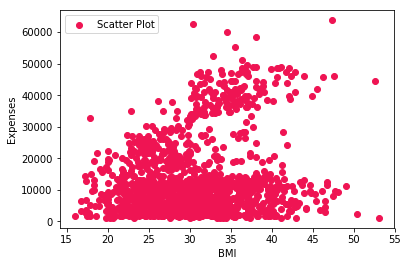

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Check how the value of y is scatter for the given value of x
plt.scatter(x, y, c='#ef1453', label='Scatter Plot')
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.legend()
plt.show()

In [8]:
#Total number of rows
total = len(x)
print('Total number of rows :' + str(total))

#Find the means
x_mean = np.mean(x)
y_mean = np.mean(y)

print('The mean of x and y are : '+ str(x_mean) + ' and ' + str(y_mean))


Total number of rows :1338
The mean of x and y are : 30.66547085201794 and 13270.422414050823


In [0]:
#A Linear line is represented by y = mx + c
#Calculate the value of m and c, where m is the slope of the regression line and c is the intercept

Nr, Dr = 0,0
for n in range(total):
  Nr = Nr + (x[n] - x_mean) * (y[n] - y_mean)
  Dr = Dr + (x[n] - x_mean)**2

In [0]:
m = Nr/Dr
c = y_mean - (m * x_mean)

In [11]:
#Check the values of m and c
print('The slope is : ' + str(m))
print('\nThe intercept is : ' + str(c))

The slope is : [394.32764384]

The intercept is : [1178.17954574]


In [0]:
#Calculate the value of y using the equation y = mx + c
y_pred = m*x + c

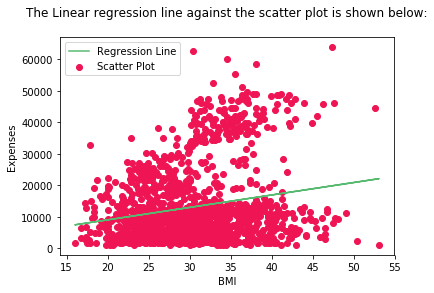

In [19]:
# Plot the original values of x (BMI) and y (Expenses)
plt.scatter(x, y, c='#ef1453', label='Scatter Plot')

# Plot the predicted values of y (Expenses) for x (BMI) found using the Simple Linear Regression model
plt.plot(x, y_pred, color='#58b970', label='Regression Line')

x_axis = 'BMI'
y_axis = 'Expenses'

plt.xlabel(x_axis)
plt.ylabel(y_axis)

plt.title('The Linear regression line against the scatter plot is shown below:\n')

plt.legend()
plt.show()

In [0]:
# Verify how the regression line is with the scattered plot. This shows how good our predictive model is using the simple Linear regression technique
# You can observe that the red dots are scatterd far away with the line on both the sides.
# Lets calculate how efficient our model is: Actual Vs Predicted value, by calculating the Coefficient of determination, which is
# The Squared deviation of Predicted value from the mean over the squared deviation of actual value from the mean

In [20]:
COD_Nr = 0
COD_Dr = 0

for n in range(total):
  y_exp = m * x[n] + c
  COD_Nr += (y[n] - y_exp)**2
  COD_Dr += (y[n] - y_mean)**2
  
  
COD = 1 - (COD_Nr/COD_Dr)
print(COD)

[0.03943253]


In [0]:
#We can also fing the Cooefficient of Determination using the SciKit learn library
from sklearn.linear_model import LinearRegression as LR

In [36]:
model = LR()
x_lr = x.reshape((total,1))

model = model.fit(x_lr,y)
y_lr_pred = model.predict(x_lr)

COD_lr = model.score(x_lr,y)

print('The Coefficient of Determination using SciKit Learn : ' + str(COD_lr))
print('The Coefficient of Determination using normal formula : ' + str(COD))

The Coefficient of Determination using SciKit Learn : 0.03943252905734407
The Coefficient of Determination using normal formula : [0.03943253]
